In [12]:
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
from codice_py.etl import df_players, df_appearances, df_club_games, df_clubs, df_competitions, df_game_events, df_game_lineups,\
                          df_games, df_player_valuations
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Histogram of height in cm')

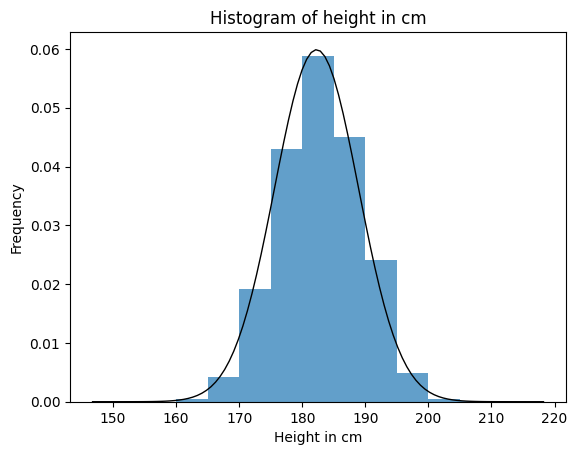

In [24]:
from scipy.stats import norm
plt.figure()
plt.hist(df_players["height_in_cm"], bins=np.arange(150, 220, 5), alpha=0.7, density = True)

#Parametri della distribuzione normale
mu, std = norm.fit(df_players['height_in_cm'])

# Curva di approssimazione
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)


plt.xlabel("Altezza in cm")
plt.ylabel("Frequenza")
plt.title("Distribuzione altezza giocatori")

In [15]:
%pip install geopandas matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [74]:
import pandas as pd

                       player_code   type
0                   miroslav-klose  Goals
1                   miroslav-klose  Goals
2                   miroslav-klose  Goals
3                   miroslav-klose  Goals
4                   miroslav-klose  Goals
...                            ...    ...
161769                artem-nyznyk  Goals
161770            daniil-teplyakov  Goals
161771            roman-yuvkhymets  Goals
161772         kahveh-zahiroleslam  Goals
161773  georgios-konstantakopoulos  Goals

[161774 rows x 2 columns]
                       player_code   type
0                   miroslav-klose  Goals
1                   miroslav-klose  Goals
2                   miroslav-klose  Goals
3                   miroslav-klose  Goals
4                   miroslav-klose  Goals
...                            ...    ...
161769                artem-nyznyk  Goals
161770            daniil-teplyakov  Goals
161771            roman-yuvkhymets  Goals
161772         kahveh-zahiroleslam  Goals
161773 

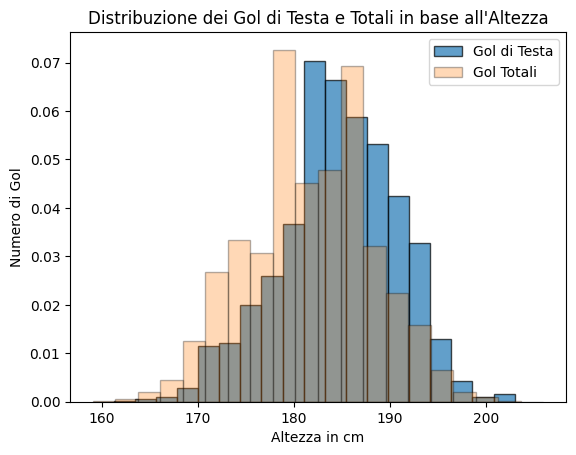

In [87]:
df_head_goal = pd.merge(df_players, df_game_events[df_game_events["description"].notna() & df_game_events['description'].str.contains('Header')], on ='player_id', how='inner')
df_head_goal = df_head_goal.loc[df_head_goal['description'].str.split().str[1].str.strip().str.contains("Header")]

df_goal_totali = pd.merge(df_players, df_game_events[df_game_events["type"].notna() & df_game_events['type'].str.contains('Goals')], on ='player_id', how='inner')
print(df_goal_totali[['player_code','type']])

df_goal_totali = df_goal_totali.loc[df_goal_totali['type'].str.contains("Goals")]
print(df_goal_totali[['player_code','type']])
print()

print(df_head_goal.columns)
print(df_head_goal[['game_event_id','description']])

plt.figure()
plt.hist(df_head_goal['height_in_cm'], bins=20, edgecolor='black', alpha=0.7, label='Gol di Testa', density = True)
plt.hist(df_goal_totali['height_in_cm'], bins=20, edgecolor='black', alpha=0.3, label='Gol Totali', density = True)
# Aggiungi etichette, titolo e legenda
plt.xlabel('Altezza in cm')
plt.ylabel('Numero di Gol')
plt.title('Distribuzione dei Gol di Testa e Totali in base all\'Altezza')
plt.legend()

# Mostra il grafico
plt.show()





In [16]:
import geopandas as gpd

# Leggi il GeoDataFrame del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df_players_geo = world.merge(df_players, left_on='name', right_on='country_of_birth', how='left')
print(df_players_geo.head())

print(df_players_geo.head())



      pop_est continent    name_x iso_a3  gdp_md_est  \
0    889953.0   Oceania      Fiji    FJI        5496   
1  58005463.0    Africa  Tanzania    TZA       63177   
2  58005463.0    Africa  Tanzania    TZA       63177   
3  58005463.0    Africa  Tanzania    TZA       63177   
4  58005463.0    Africa  Tanzania    TZA       63177   

                                            geometry  player_id  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...        NaN   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   182201.0   
2  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   568915.0   
3  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   666563.0   
4  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   833315.0   

                 name_y  last_season  current_club_id  ...   foot  \
0                   NaN          NaN              NaN  ...    NaN   
1          Ally Samatta       2023.0           1091.0  ...  right   
2  Yohana Oscar Mkomola       2020.0          49364.0

C:\Users\mikdr\AppData\Local\Temp\ipykernel_6744\1247904751.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


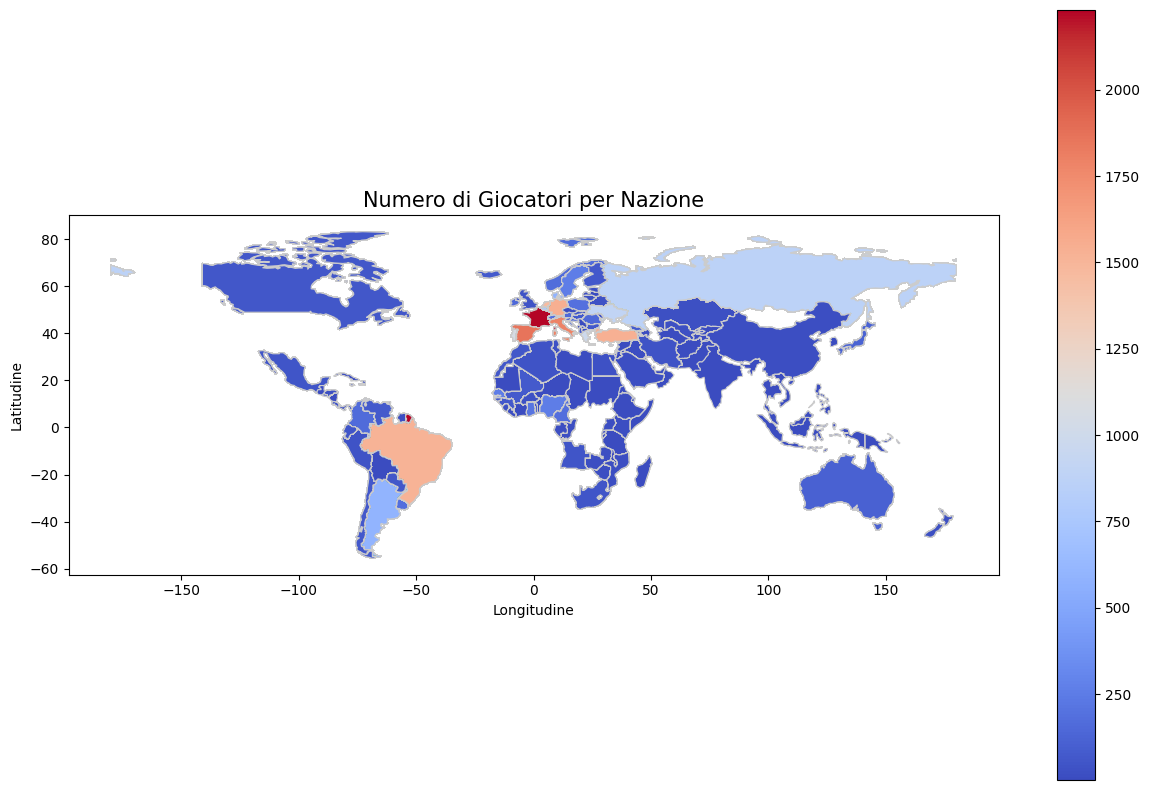

In [17]:
#Esegui l'aggregazione separatamente
agg_data = df_players_geo['player_id'].groupby(df_players_geo['country_of_birth']).count().reset_index()
agg_data.columns = ['country_of_birth', 'num_players']

# Unisci l'aggregazione con il tuo DataFrame
df_players_geo = pd.merge(df_players_geo, agg_data, on='country_of_birth', how='left')

# Disegna la mappa di calore
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Usa il metodo plot di GeoDataFrame per visualizzare la mappa di calore
df_players_geo.plot(column='num_players', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Aggiungi titolo e etichette
ax.set_title('Numero di Giocatori per Nazione', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra la legenda
leg = ax.get_legend()
if leg is not None:
    leg.set_bbox_to_anchor((1, 0.5))

# Mostra il grafico
plt.show()
